<a href="https://colab.research.google.com/github/sonjoy1s/project_weak_ML/blob/main/student_performance_prediction_26%2627_Modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#Regression model

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



from sklearn.ensemble import VotingRegressor, StackingRegressor


#metrices

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd. read_csv("/content/bangladesh_student_performance.csv")

In [59]:
df

,date,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,29/04/2018,M,18,Urban,GT3,Together,2,2,Teacher,Health,No,No,108426,2,3.57,3.18
2014,29/04/2018,M,19,Urban,GT3,Together,0,3,Other,Teacher,Yes,No,100665,5,4.05,3.13
2015,29/04/2018,M,18,Urban,GT3,Together,3,2,Services,Farmer,Yes,No,92291,1,3.93,3.15
2016,29/04/2018,M,19,Rural,GT3,Together,0,2,At_home,Teacher,No,No,43926,3,3.34,2.83


# Y Data profiling

In [60]:
len(df.columns)

16

In [61]:
len(df)

2018

#simply columns

In [62]:
df.columns= [
    'date','st_gender','st_age','st_address',
    'st_fam_size','pstatus','m_edu','f_edu',
    'm_job','f_job','st_relationship',
    'smoker','tuition_fee','time_with_friends',
    'ssc_result','hsc_result'
]

In [63]:
df.columns.size

16

#drop data

In [64]:
if 'date' in df.columns:
  df.drop( columns = ['date'], inplace=True )

In [65]:
df.columns.size

15

#Size

In [66]:
df.shape

(2018, 15)

# Correlatin for Numerical Value

In [67]:
corr_target = df.select_dtypes(include=np.number).corr()['hsc_result'].sort_values(ascending=False)
print(corr_target)

hsc_result           1.000000
ssc_result           0.950178
m_edu                0.063776
f_edu                0.054811
tuition_fee          0.038068
st_age              -0.009857
time_with_friends   -0.156356
Name: hsc_result, dtype: float64


# Separate X and y

In [68]:
X = df.drop('hsc_result',axis=1)
y = df['hsc_result']

#Numerical Column and Categorical Columns

In [69]:
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

In [70]:
numeric_features

Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')

In [71]:
categorical_features

Index(['st_gender', 'st_address', 'st_fam_size', 'pstatus', 'm_job', 'f_job',
       'st_relationship', 'smoker'],
      dtype='object')

#pipeline

In [72]:
#for numerical features

num_transformer = Pipeline (
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

# For categorical feature

In [73]:
cat_transformer = Pipeline( steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
] )

In [74]:
#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,numeric_features),
        ('cat',cat_transformer,categorical_features)
    ]
    )

In [75]:
#split them

In [76]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

# Ensemble - boosting, stacking

In [77]:
#base learner

reg_lr = LinearRegression()
reg_rf = RandomForestRegressor( n_estimators=100, random_state=42 )
reg_gb = GradientBoostingRegressor( n_estimators=100 , random_state=42 )

In [78]:
#Voting regressor

voting_reg = VotingRegressor(
    estimators= [
        ('lr', reg_lr),
        ('rf',reg_rf),
        ('gb', reg_gb)
    ]
)

In [79]:
#stacking

stacking_reg = StackingRegressor(
    estimators= [
        ('rf',reg_rf),
        ('gb', reg_gb)
    ],
    final_estimator= Ridge() #the meta learner
)


# Model Training

In [80]:
#dictionary of all model

model_to_train = {
    'Linear Regression' : reg_lr,
    'Random Forest' : reg_rf,
    'Gradient Boosting': reg_gb,
    'Voting Ensemble ' : voting_reg,
    'Stacking Ensemble ' : stacking_reg

}

In [81]:
#training & Evaluation

result = []

for name , model in model_to_train.items():
  #create full pipeline with preprocessor
  pipe = Pipeline(
      [
          ('preprocessor', preprocessor),
          ('model',model)
      ]
  )

  #train

  pipe.fit(X_train,y_train)

  #predict

  y_pred = pipe.predict(X_test)

  #Evaluate

  r2 = r2_score(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test,y_pred)

  result.append({
      "Model": name,
      "R2 Score" :r2,
      "RMSE": rmse,
      "MAE" : mae
  })

results_df = pd.DataFrame(result).sort_values("R2 Score", ascending=False)

print(results_df)

                Model  R2 Score      RMSE       MAE
4  Stacking Ensemble   0.959566  0.123105  0.098696
2   Gradient Boosting  0.959565  0.123107  0.098902
3    Voting Ensemble   0.957528  0.126169  0.100838
1       Random Forest  0.950248  0.136556  0.108201
0   Linear Regression  0.945920  0.142371  0.111376


# Visualization

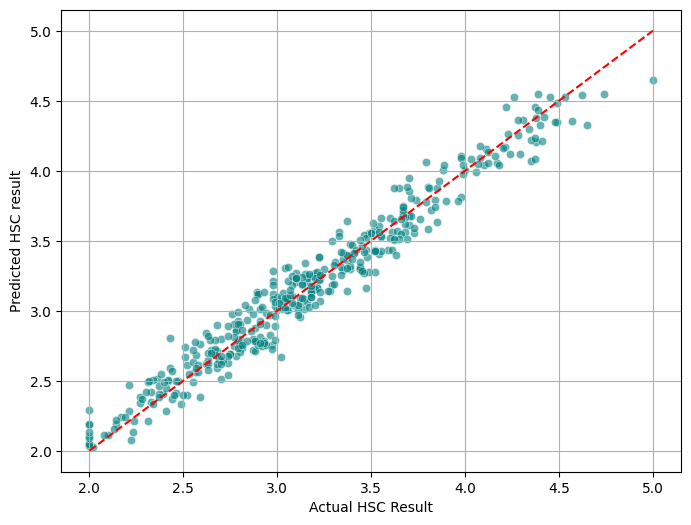

In [82]:
best_model_name = results_df.iloc[0]['Model']
best_model_obj = model_to_train[best_model_name]


#fit the best model

final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model',best_model_obj)
])

final_pipe.fit(X_train,y_train)
y_final_pred = final_pipe.predict(X_test)


#plot Actual vs predicted

plt.figure( figsize = (8,6) )

sns.scatterplot(x=y_test, y=y_final_pred, alpha = 0.6, color='teal' )
plt.plot( [2,5] , [2,5], color = "red", linestyle = '--'  )

plt.xlabel("Actual HSC Result")
plt.ylabel("Predicted HSC result")

plt.grid(True)
plt.show()

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
rf_pipeline = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',RandomForestRegressor(n_estimators=100,random_state=42))

     ]

  )

In [85]:
# 5 fold cv

cv_scores = cross_val_score( rf_pipeline,X_train,y_train,cv=5, scoring='neg_mean_squared_error' )
cv_rmse = np.sqrt(-cv_scores)

print(cv_rmse)

[0.13825617 0.14202924 0.15369812 0.14773708 0.12940278]


In [86]:
print(cv_rmse.mean())

0.14222467953735998


In [87]:
print(cv_rmse.std())

0.00827302663832195


## Stacking Ensemble

In [88]:
#Stacking Pipeline
stacking_pipe = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',stacking_reg)
    ]
)

In [89]:
#Cross Score Train:

cv_scores = cross_val_score(
    stacking_pipe,
    X_train, y_train,
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

stacking_rmse = np.sqrt(-cv_scores)

print(stacking_rmse)

[0.12742194 0.1342731  0.13336693 0.13391606 0.11927744]


## Grid Search CV

In [90]:
rf_pipe = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',RandomForestRegressor(n_estimators=100,random_state=42))
    ]
)

In [91]:
#Define the Gride

param_grid = {
    'model__n_estimators':[100,200],
    'model__max_depth':[None,10,20],
    'model__min_samples_split':[2,5]
}

In [92]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator = rf_pipe,
    param_grid = param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)


In [93]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['st_gender', 'st_address', 'st_fam_size', 'pstatus', 'm_job', 'f_job',
       'st_relationship', 'smoker'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [94]:
print(-grid_search.best_score_)

0.020064250425616187


In [95]:
print(grid_search.best_params_)

{'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}


## Randommize Cross Validation(CV)

In [104]:
from scipy.stats import randint
param_dist = {
    'model__n_estimators': randint(100,500),
    'model__max_depth': [None,10,29],
    'model__min_samples_split': randint(1,10)
}

In [105]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = rf_pipe,
    param_distributions = param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)


In [106]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy=...
                                              RandomForestRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 29],
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acd15629c70>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acd156257c0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [107]:
import pickle

filename = "random_forest_model.pkl"
with open(filename,"wb") as file :
  pickle.dump(random_search,file)


In [108]:
#Road Pickle File :

with open("/content/random_forest_model.pkl","rb") as file:
  rf_loaded_model = pickle.load(file)

In [110]:
rf_loaded_model.predict(X_test)

array([3.25389178, 3.65135463, 3.68437401, 3.93819993, 4.10928723,
       3.27100146, 4.09964785, 2.50801055, 2.10108091, 3.27582164,
       3.57527603, 2.93104246, 3.19883064, 4.50296008, 3.01832587,
       2.63595385, 3.61606203, 3.35846017, 2.87920878, 2.86785921,
       2.76013172, 3.18987175, 2.88732775, 3.23378842, 2.05378079,
       2.64788877, 3.2270904 , 4.03147561, 3.11436372, 4.09647478,
       2.46314233, 3.83994194, 4.5018821 , 2.57208642, 3.19078939,
       3.2159185 , 2.75204488, 3.5724241 , 2.45261863, 2.60539475,
       2.99196933, 2.96515428, 3.65012611, 2.77703321, 2.32451346,
       3.00689   , 2.61717685, 2.70183572, 4.10437901, 3.21667038,
       2.99136059, 3.40897047, 4.23285914, 3.54569106, 2.98379152,
       3.23678681, 3.26701938, 2.79513402, 3.71244804, 2.70813892,
       3.03771752, 2.65597916, 2.50947728, 4.43457314, 2.58081199,
       3.22667086, 3.86617998, 2.72598433, 3.06783388, 3.23666124,
       3.01162682, 2.63232789, 2.70175537, 3.43699125, 3.03988

## MLFlow

In [111]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 kB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.2 MB/s eta 0:00:00


In [115]:
import mlflow
import mlflow.sklearn


mlflow.set_experiment("Student performance Using Random Forest")

my_params = {
    'n_estimators': 100,
    'max_depth':10,
    'random_state':42
}


simple_rf_pipe = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',RandomForestRegressor(**my_params))
    ]
)


#start mlflow

with mlflow.start_run(run_name = "single_rf"):

  mlflow.log_params(my_params)
  mlflow.log_param("model_type","RandomForestRegressor")


#train :

simple_rf_pipe.fit(X_train,y_train)

y_train_pred = simple_rf_pipe.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))

In [116]:
print(train_rmse)

0.06482000453853981


In [126]:
#For Test:

y_test_pred = simple_rf_pipe.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))

print(test_rmse)

mlflow.log_metric("test_rmse",test_rmse)

0.13592219413742918


In [127]:
# Train Log matric deteils
#mlflow.log_metric("train rmse",train_rmse)
mlflow.log_metric("test_rmse",train_rmse)